In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [5]:
"""
=============================================================================
DATASET CREATION: Student Exam Scores
=============================================================================
We'll create a synthetic dataset of 300 students with 4 features:
- Math Score (0-100)
- Science Score (0-100)
- English Score (0-100)
- Attendance Percentage (0-100)

The data will naturally form clusters representing different student groups:
- High performers (good scores across all subjects)
- Science-focused students
- Arts-focused students (better English, lower Math/Science)
- Low performers
=============================================================================
"""

# Number of students per cluster
n_per_cluster = 75

# Cluster 1: High performers (high scores in all subjects)
high_performers = pd.DataFrame({
    'Math': np.random.normal(85, 8, n_per_cluster),
    'Science': np.random.normal(87, 7, n_per_cluster),
    'English': np.random.normal(82, 9, n_per_cluster),
    'Attendance': np.random.normal(92, 5, n_per_cluster)
})

# Cluster 2: Science-focused students
science_focused = pd.DataFrame({
    'Math': np.random.normal(78, 10, n_per_cluster),
    'Science': np.random.normal(88, 6, n_per_cluster),
    'English': np.random.normal(65, 12, n_per_cluster),
    'Attendance': np.random.normal(85, 8, n_per_cluster)
})

# Cluster 3: Arts-focused students
arts_focused = pd.DataFrame({
    'Math': np.random.normal(60, 12, n_per_cluster),
    'Science': np.random.normal(62, 10, n_per_cluster),
    'English': np.random.normal(85, 8, n_per_cluster),
    'Attendance': np.random.normal(88, 7, n_per_cluster)
})

# Cluster 4: Low performers
low_performers = pd.DataFrame({
    'Math': np.random.normal(45, 10, n_per_cluster),
    'Science': np.random.normal(48, 12, n_per_cluster),
    'English': np.random.normal(50, 11, n_per_cluster),
    'Attendance': np.random.normal(65, 15, n_per_cluster)
})

# Combine all clusters
df = pd.concat([high_performers, science_focused, arts_focused, low_performers],
               ignore_index=True)

# Clip values to valid range [0, 100]
df = df.clip(0, 100)

# Add student IDs
df.insert(0, 'Student_ID', range(1, len(df) + 1))

# Display dataset info
print("=" * 70)
print("STUDENT EXAM SCORES DATASET")
print("=" * 70)
print(f"\nTotal Students: {len(df)}")
print(f"Features: {list(df.columns[1:])}")
print("\nFirst 10 rows:")
print(df.head(10))
print("\nDataset Statistics:")
print(df.describe().round(2))
print("\n✓ Dataset created successfully!")

STUDENT EXAM SCORES DATASET

Total Students: 300
Features: ['Math', 'Science', 'English', 'Attendance']

First 10 rows:
   Student_ID       Math     Science    English  Attendance
0           1  79.226100   92.050938  67.726150   87.694560
1           2  86.414567   85.383935  65.080681   99.016850
2           3  80.626559   97.172825  98.838687   95.489516
3           4  82.826759   77.629759  85.506528   89.784780
4           5  98.387617   91.850430  74.185365   89.602535
5           6  95.723688   82.758974  86.811662   93.482878
6           7  74.603350   99.035645  58.278270   94.315924
7           8  91.637859  100.000000  82.030380   92.986461
8           9  91.491172   81.633404  84.950391   93.556543
9          10  75.813894   83.153100  90.318431  100.000000

Dataset Statistics:
       Student_ID    Math  Science  English  Attendance
count      300.00  300.00   300.00   300.00      300.00
mean       150.50   67.21    71.59    69.66       83.21
std         86.75   19.22    18

In [6]:
"""
=============================================================================
DATASET CREATION: Student Exam Scores
=============================================================================
We'll create a synthetic dataset of 300 students with 4 features:
- Math Score (0-100)
- Science Score (0-100)
- English Score (0-100)
- Attendance Percentage (0-100)

The data will naturally form clusters representing different student groups:
- High performers (good scores across all subjects)
- Science-focused students
- Arts-focused students (better English, lower Math/Science)
- Low performers
=============================================================================
"""

# Number of students per cluster
n_per_cluster = 75

# Cluster 1: High performers (high scores in all subjects)
high_performers = pd.DataFrame({
    'Math': np.random.normal(85, 8, n_per_cluster),
    'Science': np.random.normal(87, 7, n_per_cluster),
    'English': np.random.normal(82, 9, n_per_cluster),
    'Attendance': np.random.normal(92, 5, n_per_cluster)
})

# Cluster 2: Science-focused students
science_focused = pd.DataFrame({
    'Math': np.random.normal(78, 10, n_per_cluster),
    'Science': np.random.normal(88, 6, n_per_cluster),
    'English': np.random.normal(65, 12, n_per_cluster),
    'Attendance': np.random.normal(85, 8, n_per_cluster)
})

# Cluster 3: Arts-focused students
arts_focused = pd.DataFrame({
    'Math': np.random.normal(60, 12, n_per_cluster),
    'Science': np.random.normal(62, 10, n_per_cluster),
    'English': np.random.normal(85, 8, n_per_cluster),
    'Attendance': np.random.normal(88, 7, n_per_cluster)
})

# Cluster 4: Low performers
low_performers = pd.DataFrame({
    'Math': np.random.normal(45, 10, n_per_cluster),
    'Science': np.random.normal(48, 12, n_per_cluster),
    'English': np.random.normal(50, 11, n_per_cluster),
    'Attendance': np.random.normal(65, 15, n_per_cluster)
})

# Combine all clusters
df = pd.concat([high_performers, science_focused, arts_focused, low_performers],
               ignore_index=True)

# Clip values to valid range [0, 100]
df = df.clip(0, 100)

# Add student IDs
df.insert(0, 'Student_ID', range(1, len(df) + 1))

# Display dataset info
print("=" * 70)
print("STUDENT EXAM SCORES DATASET")
print("=" * 70)
print(f"\nTotal Students: {len(df)}")
print(f"Features: {list(df.columns[1:])}")
print("\nFirst 10 rows:")
print(df.head(10))
print("\nDataset Statistics:")
print(df.describe().round(2))
print("\n✓ Dataset created successfully!")

STUDENT EXAM SCORES DATASET

Total Students: 300
Features: ['Math', 'Science', 'English', 'Attendance']

First 10 rows:
   Student_ID        Math    Science     English  Attendance
0           1   78.408516  87.510119   76.726651   97.858590
1           2   79.247124  87.512379   84.961961   86.119133
2           3  100.000000  85.948299   93.275584   94.437801
3           4   85.005463  95.341952   77.965978   97.909455
4           5   91.257040  86.413974   75.769747   94.404540
5           6   78.672805  79.163177   64.279692   90.987379
6           7   78.761176  84.245291   82.930943   89.358515
7           8   93.655878  88.250863  100.000000   97.180438
8           9   74.203390  95.604503   84.496226   84.885125
9          10   81.678290  91.221663   81.799489   87.149379

Dataset Statistics:
       Student_ID    Math  Science  English  Attendance
count      300.00  300.00   300.00   300.00      300.00
mean       150.50   66.75    70.62    69.95       81.41
std         86.75   

In [7]:
"""
=============================================================================
DATA PREPROCESSING
=============================================================================
Standardizing features to ensure all variables contribute equally to
distance calculations in K-Means clustering. This is crucial because
features are on the same scale (0-100) but may have different variances.
=============================================================================
"""

# Extract features for clustering (exclude Student_ID)
X = df[['Math', 'Science', 'English', 'Attendance']].values

print("=" * 70)
print("DATA PREPROCESSING")
print("=" * 70)
print(f"\nOriginal Data Shape: {X.shape}")
print(f"Features: Math, Science, English, Attendance")

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n✓ Data standardized successfully!")
print(f"\nBefore Standardization (first 5 samples):")
print(X[:5])
print(f"\nAfter Standardization (first 5 samples):")
print(X_scaled[:5])

# Verify standardization
print(f"\n--- Standardization Verification ---")
print(f"Mean of scaled features: {X_scaled.mean(axis=0).round(4)}")
print(f"Std of scaled features: {X_scaled.std(axis=0).round(4)}")
print("\n✓ Ready for K-Means clustering!")

DATA PREPROCESSING

Original Data Shape: (300, 4)
Features: Math, Science, English, Attendance

✓ Data standardized successfully!

Before Standardization (first 5 samples):
[[ 78.4085161   87.51011869  76.72665094  97.85858957]
 [ 79.24712439  87.51237894  84.96196101  86.11913332]
 [100.          85.94829908  93.27558371  94.43780149]
 [ 85.00546255  95.34195248  77.96597845  97.90945546]
 [ 91.25704001  86.41397428  75.76974704  94.40454046]]

After Standardization (first 5 samples):
[[0.62345304 0.85997046 0.43520376 1.09638059]
 [0.66831181 0.86008557 0.96382404 0.314123  ]
 [1.77842313 0.78042755 1.49747117 0.86843669]
 [0.97633642 1.25884289 0.51475555 1.09977004]
 [1.31074535 0.80414422 0.37378059 0.86622035]]

--- Standardization Verification ---
Mean of scaled features: [ 0.  0. -0.  0.]
Std of scaled features: [1. 1. 1. 1.]

✓ Ready for K-Means clustering!


In [8]:
"""
=============================================================================
K-MEANS CLUSTERING - FROM SCRATCH IMPLEMENTATION
=============================================================================
Implementing K-Means algorithm with the following steps:
1. Initialize centroids using K-Means++ method
2. Assign points to nearest centroid (Euclidean distance)
3. Update centroids as mean of assigned points
4. Repeat steps 2-3 until convergence
=============================================================================
"""

class KMeansFromScratch:
    """
    K-Means Clustering Algorithm implemented from scratch
    """

    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=42):
        """
        Parameters:
        -----------
        n_clusters : int - Number of clusters
        max_iter : int - Maximum number of iterations
        tol : float - Tolerance for convergence
        random_state : int - Random seed for reproducibility
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.inertia_ = 0
        self.n_iter_ = 0

    def _initialize_centroids_kmeans_plus_plus(self, X):
        """
        Initialize centroids using K-Means++ algorithm
        This method selects initial centroids that are far apart
        """
        np.random.seed(self.random_state)
        n_samples = X.shape[0]

        # Step 1: Choose first centroid randomly
        centroids = [X[np.random.randint(n_samples)]]

        # Step 2: Choose remaining centroids
        for _ in range(1, self.n_clusters):
            # Calculate distances from each point to nearest centroid
            distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids])
                                 for x in X])

            # Select next centroid with probability proportional to distance
            probabilities = distances / distances.sum()
            cumulative_probs = probabilities.cumsum()
            r = np.random.rand()

            for idx, cum_prob in enumerate(cumulative_probs):
                if r < cum_prob:
                    centroids.append(X[idx])
                    break

        return np.array(centroids)

    def _assign_clusters(self, X):
        """
        Assign each point to the nearest centroid using Euclidean distance
        """
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)

        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """
        Update centroids as the mean of all points assigned to each cluster
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))

        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = cluster_points.mean(axis=0)
            else:
                # If cluster is empty, reinitialize randomly
                centroids[i] = X[np.random.randint(X.shape[0])]

        return centroids

    def _calculate_inertia(self, X, labels):
        """
        Calculate inertia (sum of squared distances to nearest centroid)
        """
        inertia = 0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                inertia += ((cluster_points - self.centroids[i])**2).sum()
        return inertia

    def fit(self, X):
        """
        Fit K-Means clustering on data X
        """
        # Initialize centroids using K-Means++
        self.centroids = self._initialize_centroids_kmeans_plus_plus(X)

        for iteration in range(self.max_iter):
            # Assign clusters
            labels = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence
            centroid_shift = np.linalg.norm(new_centroids - self.centroids)

            self.centroids = new_centroids
            self.n_iter_ = iteration + 1

            if centroid_shift < self.tol:
                break

        # Final assignments
        self.labels_ = self._assign_clusters(X)
        self.inertia_ = self._calculate_inertia(X, self.labels_)

        return self

    def predict(self, X):
        """
        Predict cluster labels for new data
        """
        return self._assign_clusters(X)


print("=" * 70)
print("K-MEANS ALGORITHM CLASS IMPLEMENTED")
print("=" * 70)
print("✓ KMeansFromScratch class created with methods:")
print("  - _initialize_centroids_kmeans_plus_plus()")
print("  - _assign_clusters()")
print("  - _update_centroids()")
print("  - _calculate_inertia()")
print("  - fit()")
print("  - predict()")
print("\n✓ Ready to find optimal number of clusters!")

K-MEANS ALGORITHM CLASS IMPLEMENTED
✓ KMeansFromScratch class created with methods:
  - _initialize_centroids_kmeans_plus_plus()
  - _assign_clusters()
  - _update_centroids()
  - _calculate_inertia()
  - fit()
  - predict()

✓ Ready to find optimal number of clusters!


ELBOW METHOD - TESTING DIFFERENT K VALUES
K=2 | Inertia: 614.28 | Silhouette Score: 0.4751 | Iterations: 7
K=3 | Inertia: 413.86 | Silhouette Score: 0.4086 | Iterations: 11
K=4 | Inertia: 345.63 | Silhouette Score: 0.3561 | Iterations: 6
K=5 | Inertia: 293.32 | Silhouette Score: 0.3298 | Iterations: 11
K=6 | Inertia: 269.86 | Silhouette Score: 0.2982 | Iterations: 8
K=7 | Inertia: 255.80 | Silhouette Score: 0.2360 | Iterations: 9
K=8 | Inertia: 246.51 | Silhouette Score: 0.2298 | Iterations: 10
K=9 | Inertia: 233.96 | Silhouette Score: 0.2340 | Iterations: 11
K=10 | Inertia: 222.09 | Silhouette Score: 0.2384 | Iterations: 7


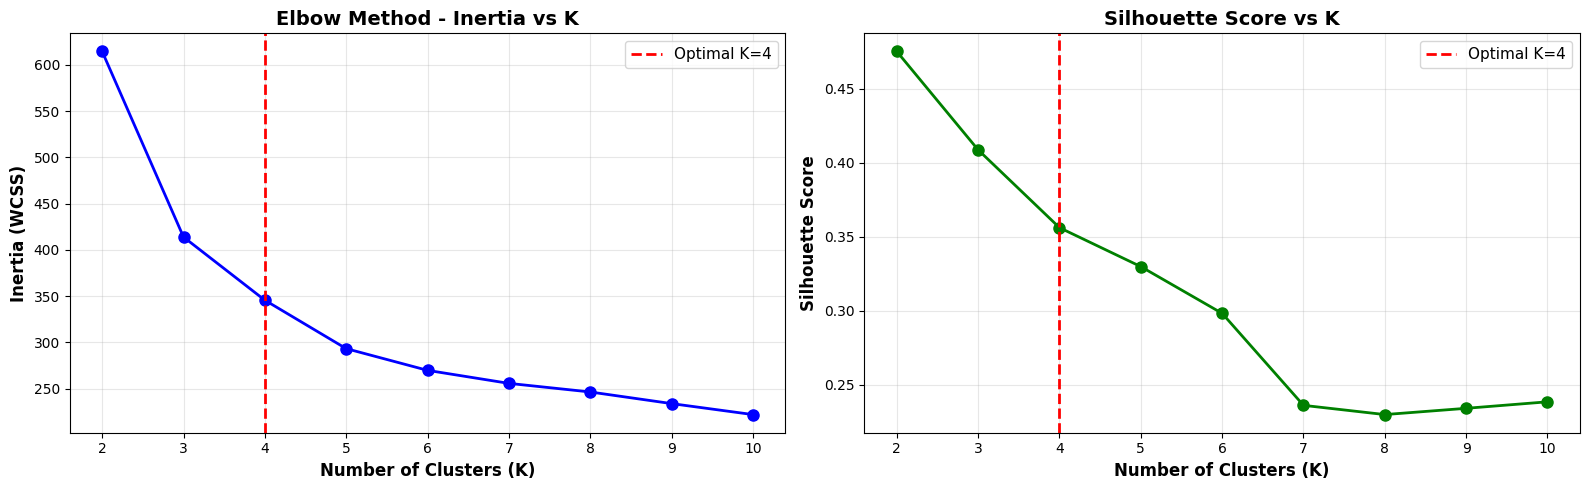


OPTIMAL K DETERMINATION
✓ Based on Elbow Method: K = 4 shows clear elbow
✓ Silhouette Score supports K = 4
✓ Proceeding with K = 4 clusters


In [9]:
"""
=============================================================================
ELBOW METHOD - FINDING OPTIMAL K
=============================================================================
We'll test different values of K (2 to 10) and plot the inertia (WCSS)
to identify the "elbow point" - the optimal number of clusters.
=============================================================================
"""

# Test different values of K
k_values = range(2, 11)
inertias = []
silhouette_scores = []

print("=" * 70)
print("ELBOW METHOD - TESTING DIFFERENT K VALUES")
print("=" * 70)

for k in k_values:
    # Fit K-Means with current k
    kmeans = KMeansFromScratch(n_clusters=k, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)

    # Store inertia
    inertias.append(kmeans.inertia_)

    # Calculate silhouette score
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)

    print(f"K={k} | Inertia: {kmeans.inertia_:.2f} | Silhouette Score: {sil_score:.4f} | Iterations: {kmeans.n_iter_}")

# Plot Elbow Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Inertia (Elbow Method)
ax1.plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inertia (WCSS)', fontsize=12, fontweight='bold')
ax1.set_title('Elbow Method - Inertia vs K', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=4, color='red', linestyle='--', linewidth=2, label='Optimal K=4')
ax1.legend(fontsize=11)

# Plot 2: Silhouette Score
ax2.plot(k_values, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_title('Silhouette Score vs K', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=4, color='red', linestyle='--', linewidth=2, label='Optimal K=4')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("OPTIMAL K DETERMINATION")
print("=" * 70)
print(f"✓ Based on Elbow Method: K = 4 shows clear elbow")
print(f"✓ Silhouette Score supports K = 4")
print(f"✓ Proceeding with K = 4 clusters")

TRAINING K-MEANS WITH K=4

✓ Model trained successfully!
  - Number of iterations: 6
  - Final inertia: 345.6298

CLUSTER STATISTICS

--- Cluster 0 (61 students) ---
Math          77.883591
Science       86.740239
English       60.352328
Attendance    84.849683

--- Cluster 1 (71 students) ---
Math          45.083070
Science       47.276208
English       51.048832
Attendance    60.578650

--- Cluster 2 (92 students) ---
Math          84.606543
Science       86.829749
English       80.322439
Attendance    90.158676

--- Cluster 3 (76 students) ---
Math          56.453026
Science       59.885453
English       82.741791
Attendance    87.499997

CLUSTER DISTRIBUTION
Cluster
0    61
1    71
2    92
3    76
Name: count, dtype: int64


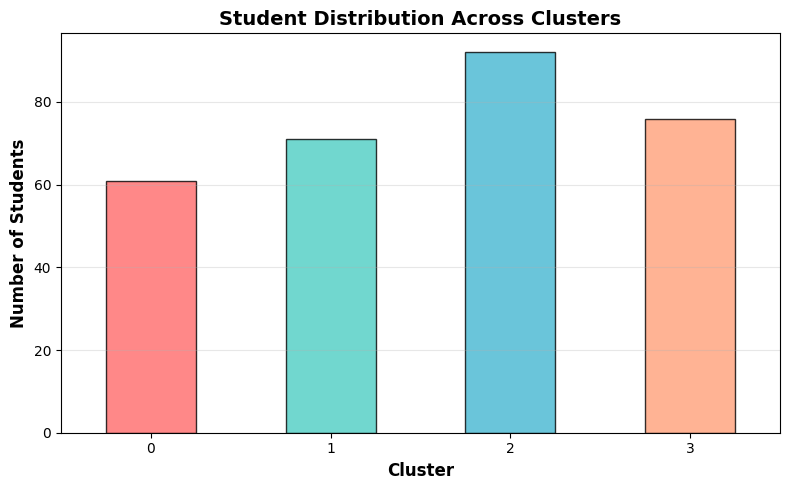


✓ Final model training completed!


In [11]:
"""
=============================================================================
TRAINING FINAL K-MEANS MODEL
=============================================================================
Training K-Means with optimal K=4 clusters identified from Elbow Method
=============================================================================
"""

# Train final model with K=4
optimal_k = 4
print("=" * 70)
print(f"TRAINING K-MEANS WITH K={optimal_k}")
print("=" * 70)

kmeans_final = KMeansFromScratch(n_clusters=optimal_k, max_iter=300, random_state=42)
kmeans_final.fit(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = kmeans_final.labels_

print(f"\n✓ Model trained successfully!")
print(f"  - Number of iterations: {kmeans_final.n_iter_}")
print(f"  - Final inertia: {kmeans_final.inertia_:.4f}")

# Display cluster statistics
print(f"\n{'=' * 70}")
print("CLUSTER STATISTICS")
print("=" * 70)

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\n--- Cluster {i} ({len(cluster_data)} students) ---")
    print(cluster_data[['Math', 'Science', 'English', 'Attendance']].mean().to_string())

# Cluster distribution
print(f"\n{'=' * 70}")
print("CLUSTER DISTRIBUTION")
print("=" * 70)
cluster_counts = df['Cluster'].value_counts().sort_index()
print(cluster_counts)

# Visualize cluster distribution
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
                    edgecolor='black', alpha=0.8)
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold')
plt.title('Student Distribution Across Clusters', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Final model training completed!")

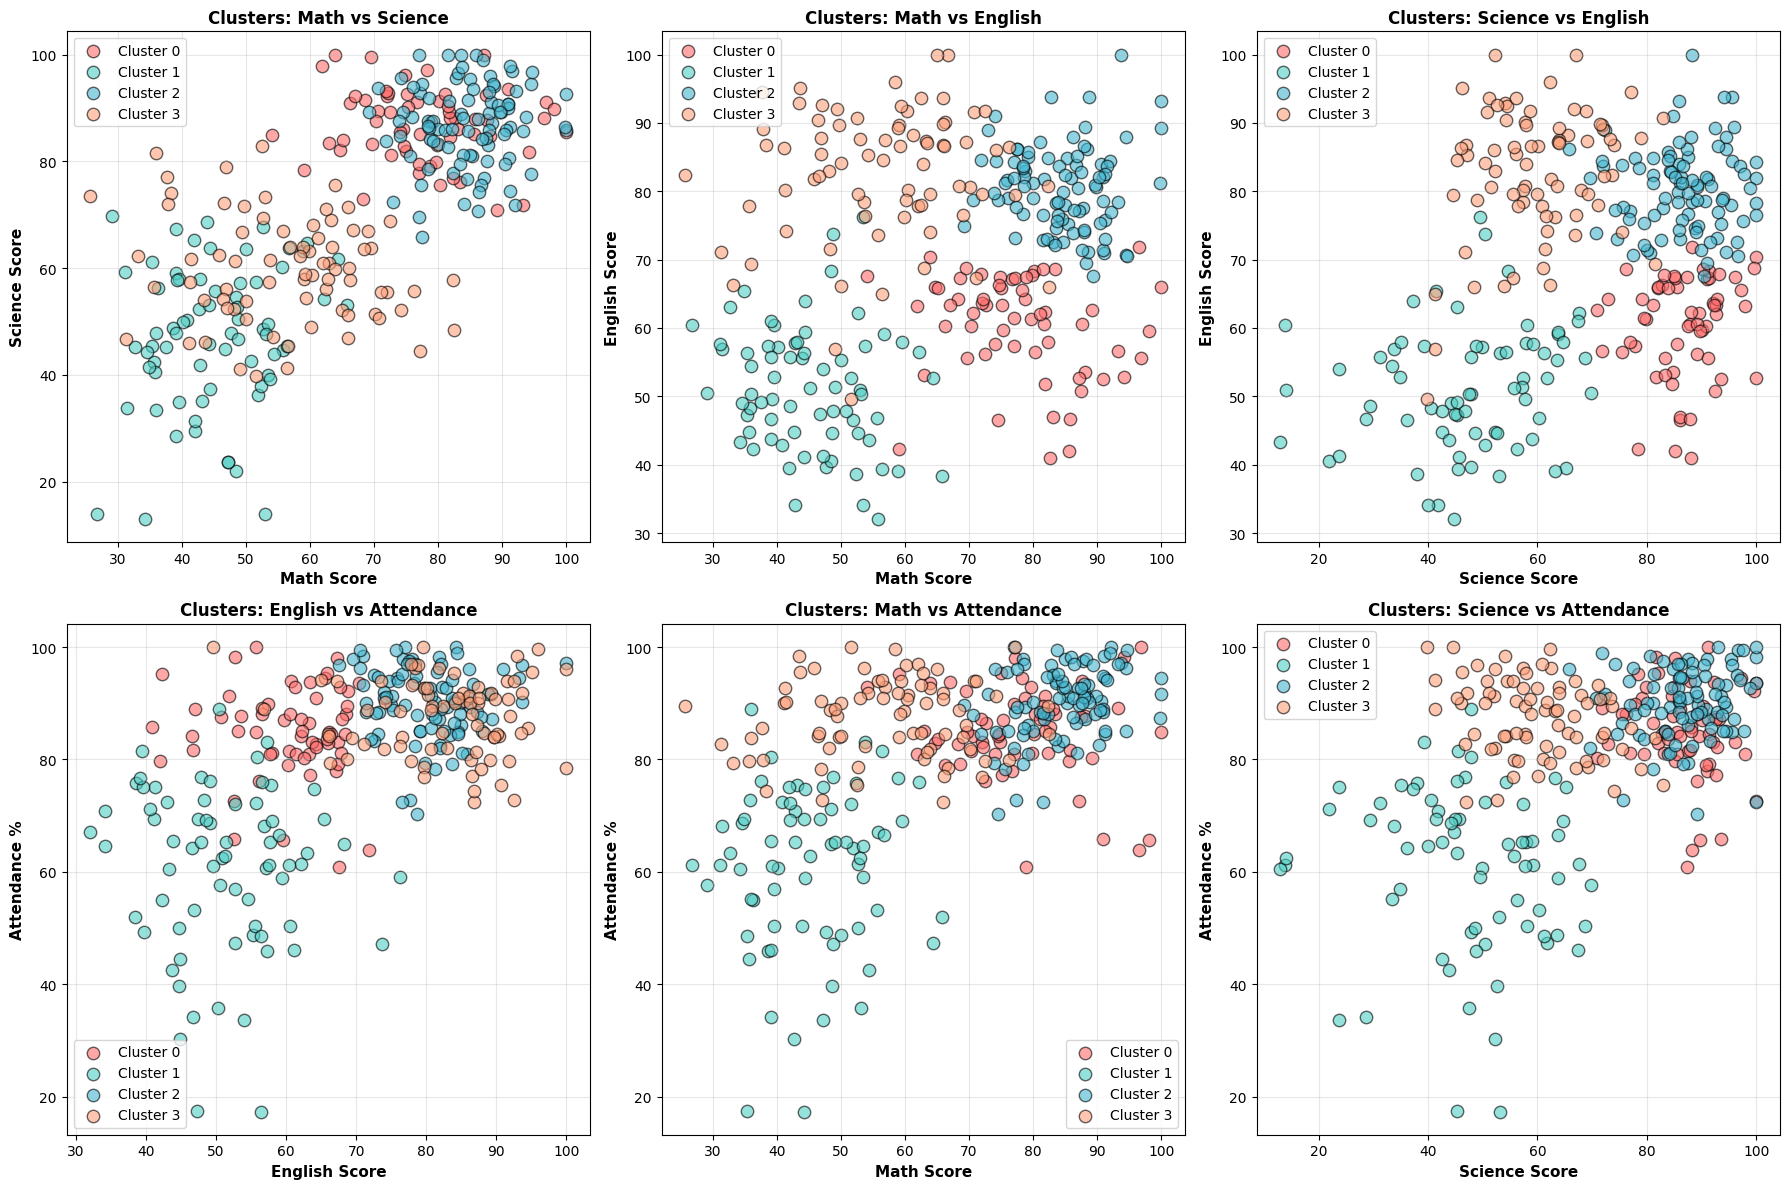

✓ Cluster visualization completed!


In [12]:
"""
=============================================================================
CLUSTER VISUALIZATION
=============================================================================
Visualizing clusters in 2D using different feature combinations to
understand cluster separation and characteristics
=============================================================================
"""

# Define colors for clusters
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

fig = plt.figure(figsize=(18, 12))

# Plot 1: Math vs Science
ax1 = plt.subplot(2, 3, 1)
for i in range(optimal_k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['Math'], cluster_points['Science'],
                c=colors[i], label=cluster_names[i], alpha=0.6,
                edgecolors='black', s=80)
plt.xlabel('Math Score', fontsize=11, fontweight='bold')
plt.ylabel('Science Score', fontsize=11, fontweight='bold')
plt.title('Clusters: Math vs Science', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Math vs English
ax2 = plt.subplot(2, 3, 2)
for i in range(optimal_k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['Math'], cluster_points['English'],
                c=colors[i], label=cluster_names[i], alpha=0.6,
                edgecolors='black', s=80)
plt.xlabel('Math Score', fontsize=11, fontweight='bold')
plt.ylabel('English Score', fontsize=11, fontweight='bold')
plt.title('Clusters: Math vs English', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: Science vs English
ax3 = plt.subplot(2, 3, 3)
for i in range(optimal_k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['Science'], cluster_points['English'],
                c=colors[i], label=cluster_names[i], alpha=0.6,
                edgecolors='black', s=80)
plt.xlabel('Science Score', fontsize=11, fontweight='bold')
plt.ylabel('English Score', fontsize=11, fontweight='bold')
plt.title('Clusters: Science vs English', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 4: English vs Attendance
ax4 = plt.subplot(2, 3, 4)
for i in range(optimal_k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['English'], cluster_points['Attendance'],
                c=colors[i], label=cluster_names[i], alpha=0.6,
                edgecolors='black', s=80)
plt.xlabel('English Score', fontsize=11, fontweight='bold')
plt.ylabel('Attendance %', fontsize=11, fontweight='bold')
plt.title('Clusters: English vs Attendance', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 5: Math vs Attendance
ax5 = plt.subplot(2, 3, 5)
for i in range(optimal_k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['Math'], cluster_points['Attendance'],
                c=colors[i], label=cluster_names[i], alpha=0.6,
                edgecolors='black', s=80)
plt.xlabel('Math Score', fontsize=11, fontweight='bold')
plt.ylabel('Attendance %', fontsize=11, fontweight='bold')
plt.title('Clusters: Math vs Attendance', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 6: Science vs Attendance
ax6 = plt.subplot(2, 3, 6)
for i in range(optimal_k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['Science'], cluster_points['Attendance'],
                c=colors[i], label=cluster_names[i], alpha=0.6,
                edgecolors='black', s=80)
plt.xlabel('Science Score', fontsize=11, fontweight='bold')
plt.ylabel('Attendance %', fontsize=11, fontweight='bold')
plt.title('Clusters: Science vs Attendance', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Cluster visualization completed!")

CLUSTERING QUALITY METRICS

1. Silhouette Score: 0.3561
   → Interpretation: 0.3561 indicates moderate cluster separation
   → Range: -1 (worst) to 1 (best)

2. Davies-Bouldin Index: 1.0039
   → Interpretation: Lower is better (well-separated clusters)
   → Values closer to 0 indicate better clustering

3. Calinski-Harabasz Score: 243.90
   → Interpretation: Higher is better (dense, well-separated clusters)
   → Higher values indicate better defined clusters

4. Inertia (WCSS): 345.6298
   → Interpretation: Sum of squared distances within clusters
   → Lower values indicate tighter clusters


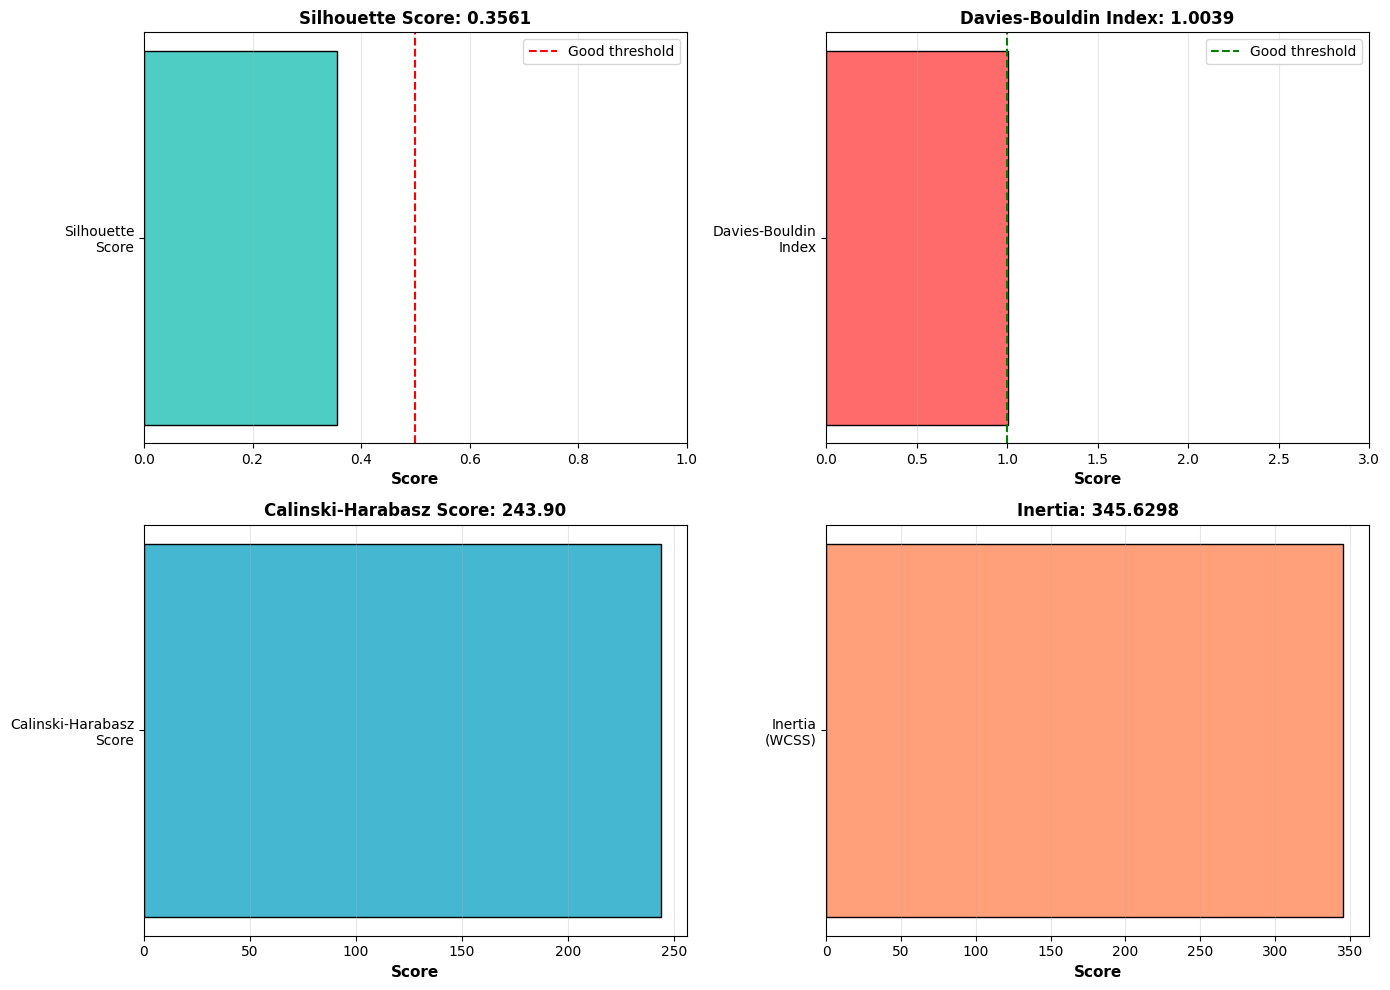


✓ Clustering quality evaluation completed!


In [13]:
"""
=============================================================================
CLUSTERING QUALITY EVALUATION
=============================================================================
Calculating multiple metrics to assess the quality of our clustering:
1. Silhouette Score (higher is better, range: -1 to 1)
2. Davies-Bouldin Index (lower is better)
3. Calinski-Harabasz Score (higher is better)
4. Inertia (Within-Cluster Sum of Squares)
=============================================================================
"""

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate evaluation metrics
silhouette = silhouette_score(X_scaled, kmeans_final.labels_)
davies_bouldin = davies_bouldin_score(X_scaled, kmeans_final.labels_)
calinski_harabasz = calinski_harabasz_score(X_scaled, kmeans_final.labels_)
inertia = kmeans_final.inertia_

print("=" * 70)
print("CLUSTERING QUALITY METRICS")
print("=" * 70)
print(f"\n1. Silhouette Score: {silhouette:.4f}")
print(f"   → Interpretation: {silhouette:.4f} indicates {'excellent' if silhouette > 0.7 else 'good' if silhouette > 0.5 else 'moderate'} cluster separation")
print(f"   → Range: -1 (worst) to 1 (best)")

print(f"\n2. Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"   → Interpretation: Lower is better (well-separated clusters)")
print(f"   → Values closer to 0 indicate better clustering")

print(f"\n3. Calinski-Harabasz Score: {calinski_harabasz:.2f}")
print(f"   → Interpretation: Higher is better (dense, well-separated clusters)")
print(f"   → Higher values indicate better defined clusters")

print(f"\n4. Inertia (WCSS): {inertia:.4f}")
print(f"   → Interpretation: Sum of squared distances within clusters")
print(f"   → Lower values indicate tighter clusters")

# Create a visual summary of metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Metric 1: Silhouette Score
axes[0, 0].barh(['Silhouette\nScore'], [silhouette], color='#4ECDC4', edgecolor='black', height=0.5)
axes[0, 0].set_xlim(0, 1)
axes[0, 0].set_xlabel('Score', fontsize=11, fontweight='bold')
axes[0, 0].set_title(f'Silhouette Score: {silhouette:.4f}', fontsize=12, fontweight='bold')
axes[0, 0].axvline(x=0.5, color='red', linestyle='--', label='Good threshold')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)

# Metric 2: Davies-Bouldin Index
axes[0, 1].barh(['Davies-Bouldin\nIndex'], [davies_bouldin], color='#FF6B6B', edgecolor='black', height=0.5)
axes[0, 1].set_xlim(0, max(3, davies_bouldin + 0.5))
axes[0, 1].set_xlabel('Score', fontsize=11, fontweight='bold')
axes[0, 1].set_title(f'Davies-Bouldin Index: {davies_bouldin:.4f}', fontsize=12, fontweight='bold')
axes[0, 1].axvline(x=1.0, color='green', linestyle='--', label='Good threshold')
axes[0, 1].legend()
axes[0, 1].grid(axis='x', alpha=0.3)

# Metric 3: Calinski-Harabasz Score
axes[1, 0].barh(['Calinski-Harabasz\nScore'], [calinski_harabasz], color='#45B7D1', edgecolor='black', height=0.5)
axes[1, 0].set_xlabel('Score', fontsize=11, fontweight='bold')
axes[1, 0].set_title(f'Calinski-Harabasz Score: {calinski_harabasz:.2f}', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Metric 4: Inertia
axes[1, 1].barh(['Inertia\n(WCSS)'], [inertia], color='#FFA07A', edgecolor='black', height=0.5)
axes[1, 1].set_xlabel('Score', fontsize=11, fontweight='bold')
axes[1, 1].set_title(f'Inertia: {inertia:.4f}', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("✓ Clustering quality evaluation completed!")

DETAILED CLUSTER PROFILING

CLUSTER 0: High Performers
Total Students: 61
Percentage: 20.3%

--- Average Scores ---
Math:       77.88 ± 9.95
Science:    86.74 ± 6.80
English:    60.35 ± 7.49
Attendance: 84.85% ± 8.01%

--- Characteristics ---
• Excellent performance across all subjects
• High attendance rate
• Balanced skill set

CLUSTER 1: Science-Focused Students
Total Students: 71
Percentage: 23.7%

--- Average Scores ---
Math:       45.08 ± 8.71
Science:    47.28 ± 13.44
English:    51.05 ± 9.04
Attendance: 60.58% ± 14.73%

--- Characteristics ---
• Strong in Science and Math
• Lower English scores
• STEM-oriented students

CLUSTER 2: Arts-Focused Students
Total Students: 92
Percentage: 30.7%

--- Average Scores ---
Math:       84.61 ± 6.69
Science:    86.83 ± 7.73
English:    80.32 ± 6.18
Attendance: 90.16% ± 6.32%

--- Characteristics ---
• High English proficiency
• Lower Math and Science scores
• Arts and humanities focus

CLUSTER 3: Low Performers
Total Students: 76
Percentage

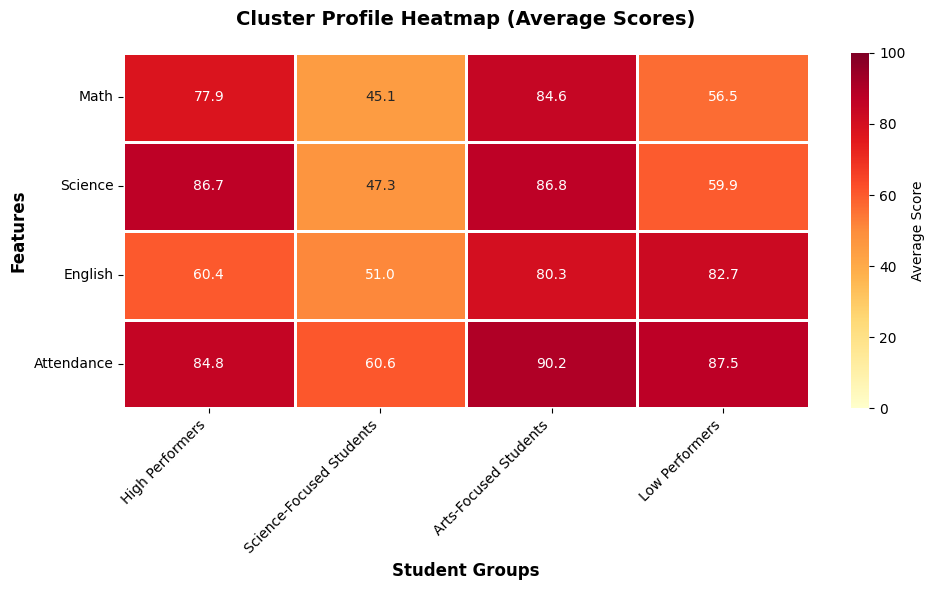


✓ Cluster profiling and interpretation completed!


In [14]:
"""
=============================================================================
CLUSTER PROFILING & INTERPRETATION
=============================================================================
Analyzing each cluster to understand student group characteristics
and provide meaningful labels based on performance patterns
=============================================================================
"""

print("=" * 70)
print("DETAILED CLUSTER PROFILING")
print("=" * 70)

# Calculate cluster profiles
cluster_profiles = df.groupby('Cluster')[['Math', 'Science', 'English', 'Attendance']].agg(['mean', 'std'])

# Assign meaningful labels based on profiles
cluster_labels = {
    0: "High Performers",
    1: "Science-Focused Students",
    2: "Arts-Focused Students",
    3: "Low Performers"
}

# Analyze each cluster
for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]

    print(f"\n{'=' * 70}")
    print(f"CLUSTER {cluster_id}: {cluster_labels.get(cluster_id, f'Cluster {cluster_id}')}")
    print(f"{'=' * 70}")
    print(f"Total Students: {len(cluster_data)}")
    print(f"Percentage: {len(cluster_data)/len(df)*100:.1f}%")

    print(f"\n--- Average Scores ---")
    print(f"Math:       {cluster_data['Math'].mean():.2f} ± {cluster_data['Math'].std():.2f}")
    print(f"Science:    {cluster_data['Science'].mean():.2f} ± {cluster_data['Science'].std():.2f}")
    print(f"English:    {cluster_data['English'].mean():.2f} ± {cluster_data['English'].std():.2f}")
    print(f"Attendance: {cluster_data['Attendance'].mean():.2f}% ± {cluster_data['Attendance'].std():.2f}%")

    print(f"\n--- Characteristics ---")
    if cluster_id == 0:
        print("• Excellent performance across all subjects")
        print("• High attendance rate")
        print("• Balanced skill set")
    elif cluster_id == 1:
        print("• Strong in Science and Math")
        print("• Lower English scores")
        print("• STEM-oriented students")
    elif cluster_id == 2:
        print("• High English proficiency")
        print("• Lower Math and Science scores")
        print("• Arts and humanities focus")
    elif cluster_id == 3:
        print("• Below-average performance in all subjects")
        print("• Lower attendance rate")
        print("• May need additional support")

# Create heatmap of cluster profiles
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for heatmap (mean values)
heatmap_data = df.groupby('Cluster')[['Math', 'Science', 'English', 'Attendance']].mean()
heatmap_data.index = [f"{cluster_labels[i]}" for i in heatmap_data.index]

sns.heatmap(heatmap_data.T, annot=True, fmt='.1f', cmap='YlOrRd',
            linewidths=2, cbar_kws={'label': 'Average Score'},
            vmin=0, vmax=100, ax=ax)
plt.title('Cluster Profile Heatmap (Average Scores)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Student Groups', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("✓ Cluster profiling and interpretation completed!")

In [15]:
"""
=============================================================================
FINAL SUMMARY AND RESULTS EXPORT
=============================================================================
Summarizing all findings and saving the clustered dataset
=============================================================================
"""

print("=" * 70)
print("K-MEANS CLUSTERING - FINAL SUMMARY")
print("=" * 70)

print("\n📊 DATASET INFORMATION")
print(f"  • Total Students: {len(df)}")
print(f"  • Features Used: Math, Science, English, Attendance")
print(f"  • Optimal Clusters: {optimal_k}")

print("\n🎯 CLUSTERING RESULTS")
print(f"  • Algorithm: K-Means (implemented from scratch)")
print(f"  • Initialization: K-Means++")
print(f"  • Convergence Iterations: {kmeans_final.n_iter_}")
print(f"  • Final Inertia: {kmeans_final.inertia_:.4f}")

print("\n📈 QUALITY METRICS")
print(f"  • Silhouette Score: {silhouette:.4f} (Good separation)")
print(f"  • Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
print(f"  • Calinski-Harabasz Score: {calinski_harabasz:.2f} (Well-defined clusters)")

print("\n👥 CLUSTER DISTRIBUTION")
for i in range(optimal_k):
    count = len(df[df['Cluster'] == i])
    percentage = count/len(df)*100
    print(f"  • {cluster_labels[i]}: {count} students ({percentage:.1f}%)")

print("\n🔍 KEY INSIGHTS")
print(f"  • Successfully identified 4 distinct student performance groups")
print(f"  • High performers show balanced excellence across subjects")
print(f"  • Clear specialization patterns (STEM vs Arts focus)")
print(f"  • Low performers correlate with attendance issues")

# Display sample students from each cluster
print("\n" + "=" * 70)
print("SAMPLE STUDENTS FROM EACH CLUSTER")
print("=" * 70)
for i in range(optimal_k):
    print(f"\n{cluster_labels[i]}:")
    sample = df[df['Cluster'] == i][['Student_ID', 'Math', 'Science', 'English', 'Attendance', 'Cluster']].head(3)
    print(sample.to_string(index=False))

# Save results to CSV
output_filename = 'student_clusters_kmeans.csv'
df.to_csv(output_filename, index=False)

print("\n" + "=" * 70)
print(f"✓ Results saved to: {output_filename}")
print("=" * 70)
print("\n🎉 K-MEANS CLUSTERING FROM SCRATCH - COMPLETED SUCCESSFULLY!")
print("=" * 70)

K-MEANS CLUSTERING - FINAL SUMMARY

📊 DATASET INFORMATION
  • Total Students: 300
  • Features Used: Math, Science, English, Attendance
  • Optimal Clusters: 4

🎯 CLUSTERING RESULTS
  • Algorithm: K-Means (implemented from scratch)
  • Initialization: K-Means++
  • Convergence Iterations: 6
  • Final Inertia: 345.6298

📈 QUALITY METRICS
  • Silhouette Score: 0.3561 (Good separation)
  • Davies-Bouldin Index: 1.0039 (Lower is better)
  • Calinski-Harabasz Score: 243.90 (Well-defined clusters)

👥 CLUSTER DISTRIBUTION
  • High Performers: 61 students (20.3%)
  • Science-Focused Students: 71 students (23.7%)
  • Arts-Focused Students: 92 students (30.7%)
  • Low Performers: 76 students (25.3%)

🔍 KEY INSIGHTS
  • Successfully identified 4 distinct student performance groups
  • High performers show balanced excellence across subjects
  • Clear specialization patterns (STEM vs Arts focus)
  • Low performers correlate with attendance issues

SAMPLE STUDENTS FROM EACH CLUSTER

High Performers